# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

>pre-trained word and phrase veators https://code.google.com/archive/p/word2vec/  
gensimを利用すればpre-trained modelをロードでき、コサイン類似度などを求められる
https://radimrehurek.com/gensim/

In [2]:
#学習済み単語ベクトルの習得
from gensim.models import KeyedVectors
vecs = KeyedVectors.load_word2vec_format('./data/GoogleNews-vectors-negative300.bin', binary=True)

#United_Statesの単語ベクトルの表示
vec_united_states = vecs["United_States"]
print(vec_united_states)

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 61. 単語の類似度
>“United States”と”U.S.”のコサイン類似度を計算せよ．

In [2]:
#similarityメソッドを使って計算できる
vecs.similarity("United_States" , "U.S.")

0.73107743

## 62. 類似度の高い単語10件
>“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
#デフォルトでは１０語表示（引数topnに語数を指定可能）
vecs.most_similar("United_States")

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
>“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [4]:
#most_similar関数の引数に足し引きする単語ベクトルを指定
#計算したベクトルと類似度の高いベクトルの習得も同時に行う
vecs.most_similar(positive=["Spain","Athens"],negative=["Madrid"])

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

In [6]:
#similar_by_vector関数（引数はベクトル）の時では出力が異なる
new_vec = vecs['Spain'] - vecs['Madrid'] + vecs['Athens']
vecs.similar_by_vector(new_vec)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472726821899),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351786613464355),
 ('Ioannis_Christou', 0.5330226421356201),
 ('Hrysopiyi_Devetzi', 0.5088489651679993),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034109354019165)]

## 64. アナロジーデータでの実験
>単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [11]:
! head ./data/questions-words.txt
! wc -l ./data/questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba
   19558 ./data/questions-words.txt


単語アナロジーの評価データは、：で始まる行にセクション名が書かれており、その下にそのセクションの事例が列挙されている

In [13]:
! grep ':' ./data/questions-words.txt

: capital-common-countries
: capital-world
: currency
: city-in-state
: family
: gram1-adjective-to-adverb
: gram2-opposite
: gram3-comparative
: gram4-superlative
: gram5-present-participle
: gram6-nationality-adjective
: gram7-past-tense
: gram8-plural
: gram9-plural-verbs


これらは
- 意味的アナロジー（semantic analogy）　　
  - capital-common-countries,capital-world,currency,city-in-state,family  
- 文法的アナロジー（syntactic analogy）　　
  - gram1-adjective-to-adverb,gram2-opposite,gram3-comparative,gram4-superlative,gram5-present-participle,gram6-nationality-adjective,gram7-past-tense,gram8-plural,gram9-plural-verbs  

に分類されている

In [10]:
from tqdm import tqdm_notebook as tqdm

with open('./data/questions-words.txt', 'r') as rf,open('./work/ch07_64.txt','w') as wf:
    for line in tqdm(rf):
    
        if line[0] == ':':
            line = line.rstrip('\n').split()
            category = line[1]
            
        #カテゴリー名の行でないとき、単語と類似度をファイルに書き込む
        #のちの問題でカテゴリー分類がしやすいように、カテゴリーも書き込む
        else:
            line = line.rstrip('\n')
            word = line.split()
            #vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算
            #最も類似度が高い単語を取得
            most_similar_word = vecs.most_similar(positive=[word[1],word[2]],negative=[word[0]],topn=1)[0]
            word , similarity = most_similar_word[0] , most_similar_word[1]
            
            #求めた単語と類似度は，各事例の末尾に追記
            wf.write(' '.join([category,line, word, str(similarity)]) + '\n')
            

In [12]:
! head ./work/ch07_64.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351871490478516
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460991501808167
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983286857605


## 65. アナロジータスクでの正解率
>64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [31]:
#正解率： 正解数/事例数 
with open('./work/ch07_64.txt') as f:
    sem_correct = 0
    sem_count = 0
    syn_correct = 0
    syn_count = 0 
    sem_categories = ['capital-common-countries','capital-world','currency','city-in-state','family']
    
    for line in f:
        line = line.split()
        category = line[0]
        
        #意味的アナロジーの正解率を計算する
        if category in sem_categories:
            sem_count += 1
            if line[4] == line[5]:
                sem_correct += 1
        
        #文法的アナロジーの正解率を計算する       
        else:
            syn_count += 1
            if line[4] == line[5]:
                syn_correct += 1
                
sem_accuracy = sem_correct/sem_count
syn_accuracy = syn_correct/syn_count
print('accuracy of semantic analogy: {}'.format(sem_accuracy))
print('accuracy of syntactic analogy: {}'.format(syn_accuracy))

accuracy of semantic analogy: 0.7308602999210734
accuracy of syntactic analogy: 0.7400468384074942


## 66. WordSimilarity-353での評価
>The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

スピアマンの相関係数は、順位尺度のデータに求められる相関の指標

In [32]:
! head ./data/wordsim353/combined.csv

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [5]:
with open('./data/wordsim353/combined.csv') as f:
    data = []
    for line in f:
        #先頭の文を除去
        if line == 'Word 1,Word 2,Human (mean)\n':
            continue
        
        line = line.rstrip('\n').split(',')
        line.append(vecs.similarity(line[0],line[1]))
        #print(vecs.similarity(line[0],line[1]))
        
        #Word１,Word 2,Human (mean),similarityをdataリストに格納
        data.append(line)

In [6]:
#スピアマンの相関係数を計算
from scipy.stats import spearmanr
import numpy as np

#print(np.array(data))
#print(np.array(data).T)
human = np.array(data).T[2]
model = np.array(data).T[3]

cor , pvalue = spearmanr(model,human)
print('spearman correlation: {}'.format(cor))

spearman correlation: 0.6849564489532376


/Users/yukikoishizuki/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [7]:
#国名に関する単語ベクトルの取得
#capital-common-countries,capital-world,currencyの事例の国名を取得してみる
countries = set()

with open('./work/ch07_64.txt') as f:
    for line in f:
        line = line.split()
        category = line[0]
        
        if category in ['capital-common-countries','capital-world']:
            countries.add(line[2])
        
        elif category in ['currency']:
            countries.add(line[1])
#リストに変換
countries_list = list(countries)

In [8]:
#クラスタ数k=5でクラスタリング
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=5)
kmeans.fit([vecs[c] for c in countries_list])
 
for i in range(5):
    #クラスター番号と一致する単語のインデックスを取得
    cluster = np.where(kmeans.labels_ == i)[0]
    
    #i番目のクラスターの国名を表示
    print('cluster number: ', i)
    print(', '.join([countries_list[j] for j in cluster])+ '\n')

cluster number:  0
Sudan, Senegal, Namibia, Mali, Niger, Rwanda, Mozambique, Kenya, Liberia, Madagascar, Guinea, Nigeria, Mauritania, Botswana, Angola, Somalia, Zimbabwe, Eritrea, Ghana, Zambia, Malawi, Burundi, Gabon, Gambia, Algeria, Uganda, Tunisia

cluster number:  1
Cyprus, Australia, Belgium, Malta, Europe, Portugal, Austria, Canada, France, Germany, Greece, Greenland, Japan, Switzerland, Italy, Spain, Norway, Liechtenstein, Sweden, Denmark, Ireland, England, USA, Finland

cluster number:  2
Peru, Jamaica, Guyana, Suriname, Belize, Dominica, Brazil, Philippines, Fiji, Mexico, Bahamas, Venezuela, Chile, Samoa, Ecuador, Argentina, Tuvalu, Uruguay, Nicaragua, Honduras, Cuba

cluster number:  3
Ukraine, Slovenia, Slovakia, Moldova, Armenia, Tajikistan, Uzbekistan, Russia, Hungary, Turkmenistan, Albania, Georgia, Kyrgyzstan, Serbia, Montenegro, Kazakhstan, Latvia, Azerbaijan, Croatia, Bulgaria, Estonia, Belarus, Macedonia, Romania, Poland, Lithuania

cluster number:  4
Syria, Korea, A

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

ward法とは、最もユークリッド距離の近いデータを同一クラスタに分類する手法

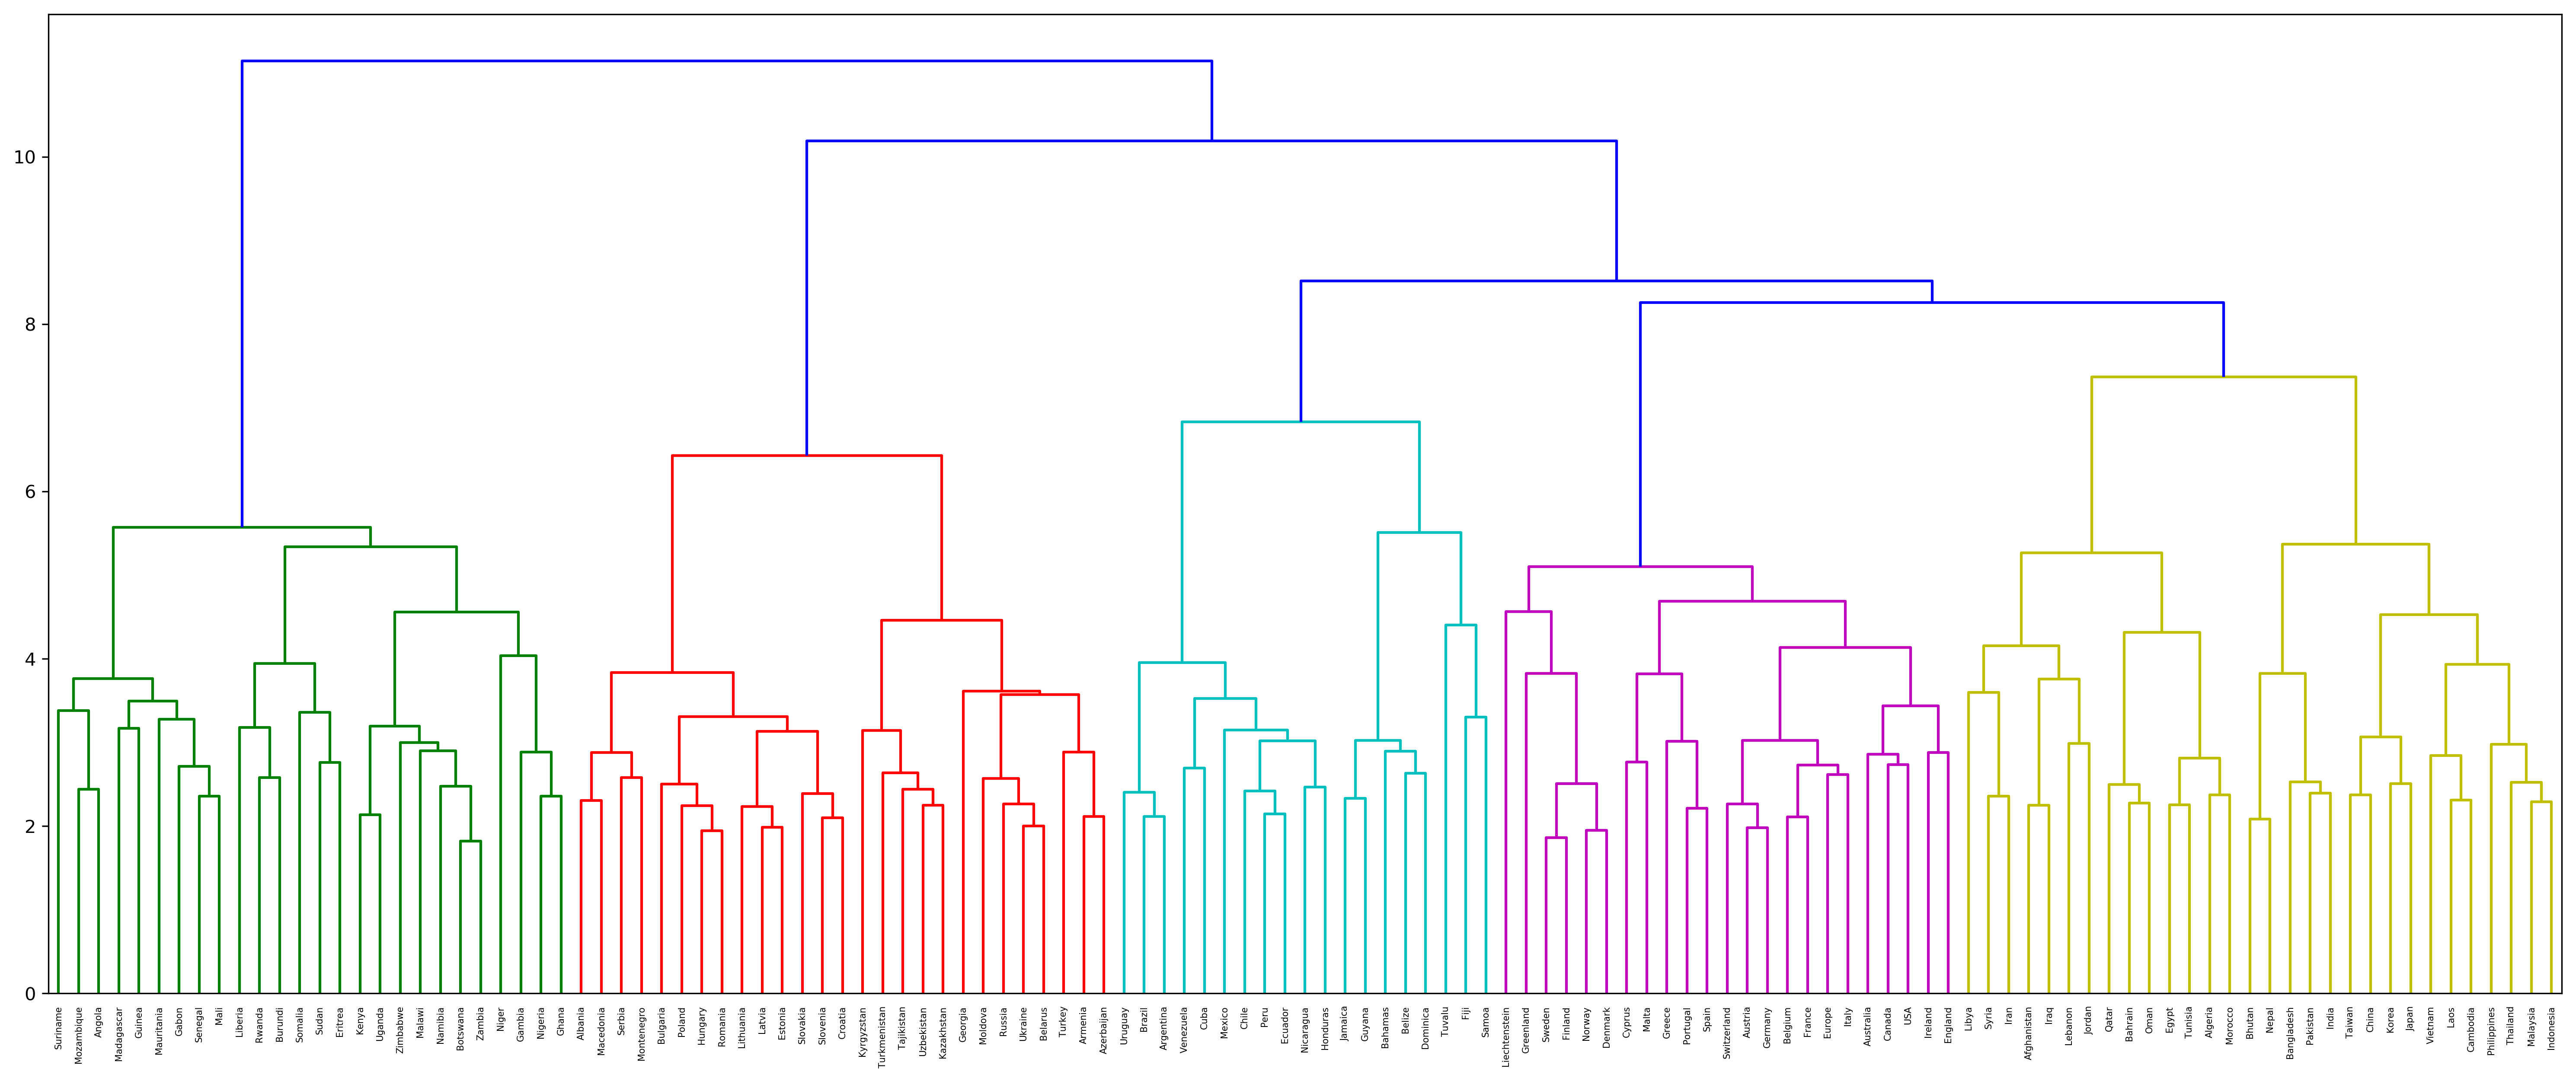

In [9]:
#デンドログラムとは樹形図のこと
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt

#ward法でクラスタリング
countries_vec = [vecs[c] for c in countries_list]
Z = linkage(countries_vec,method='ward')
fig = plt.figure(figsize=(25,10),dpi=300)
dn = dendrogram(Z,labels=countries_list)
plt.show()
fig.savefig('./work/ch07_68.png')

## 69. t-SNEによる可視化
>ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

t-SNEとは、高次元データを可視化するための次元削減アルゴリズム

/Users/yukikoishizuki/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/neighbors/base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


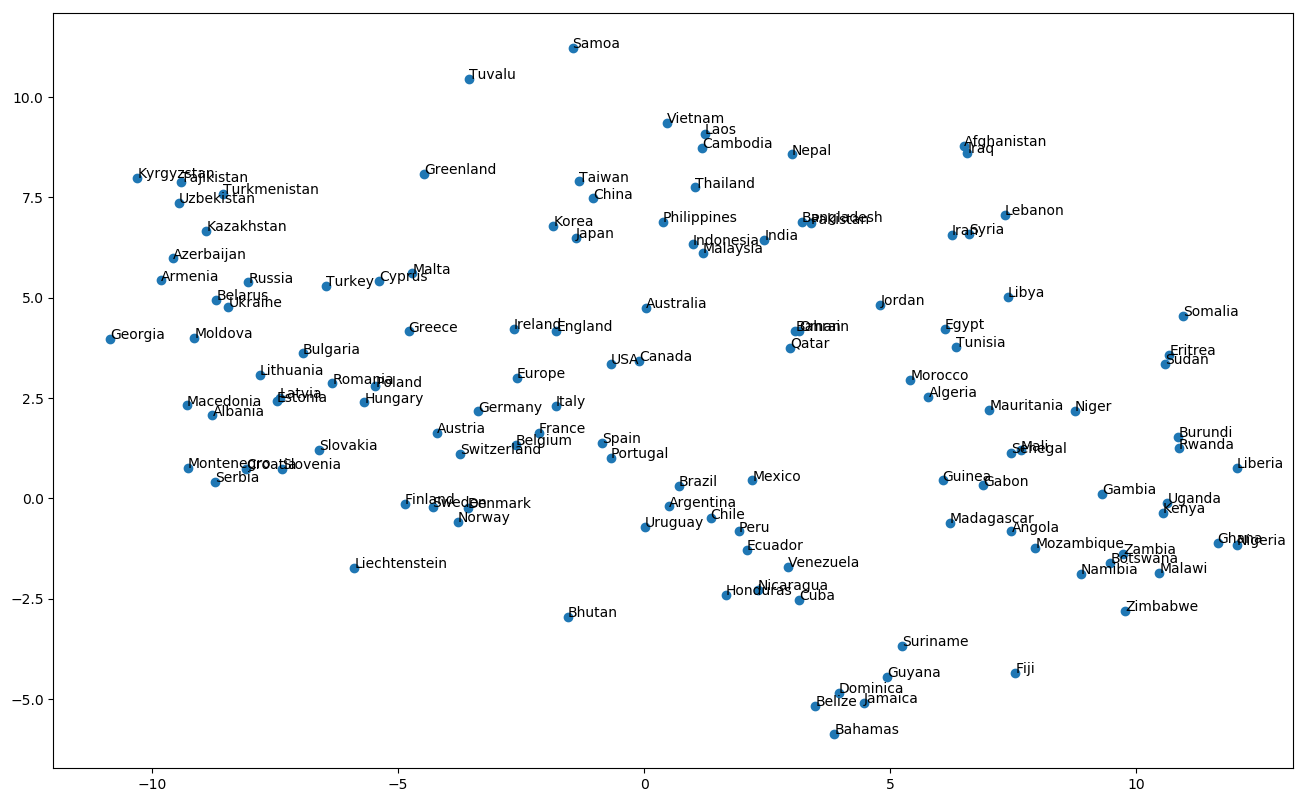

In [56]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

countries_vec = [vecs[c] for c in countries_list]
#2次元に圧縮
tsne = TSNE(n_components=2).fit_transform(countries_vec)

x_fig = [elem[0] for elem in tsne]
y_fig = [elem[1]for elem in tsne]
              
fig = plt.figure(figsize=(16,10),dpi=100)
plt.scatter(x_fig,y_fig)
ax = plt.gca()

for i , country in enumerate(countries_list):
    ax.annotate(country ,(x_fig[i],y_fig[i]))

plt.show()
fig.savefig('./work/ch07_69.png')